# Some tools for Homework 8

In [2]:
import sys

########################################
# Change the string in the line below! #
########################################
sys.path.append("/Users/Mike/desktop/UCSB/CS/CS111/cs111-2021-fall/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import networkx as nx
import json
import cs111

#######################################################
# Here are three different ways to have plots appear. #
# Uncomment the one you want to use.                  #
#                                                     #
# inline    : static plot in notebook                 #
# ipympl    : plot in notebook with pan/zoom controls #
# tk        : plot in popup window with pan/zoom      #
#                                                     #
# If %matplotlib ipympl doesn't work, try saying:     #
#   conda install -c conda-forge ipympl               #
# at a shell prompt.                                  #
#######################################################
import matplotlib
%matplotlib inline 
# %matplotlib ipympl
# %matplotlib tk 

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision = 4)

# Reading a graph with coordinates as a networkx Graph

In [3]:
# The files mesh1e1.xy and mesh1e1.edges should be in the directory you're running Jupyter from,
# or else you should give a complete path to tht directory in the string argument to cs111.read_mesh

G, xycoords = cs111.read_mesh('mesh1e1')

print('Number of vertices:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print()
print('First ten edges:', G.edges(range(10)))
print()
print('First ten vertex coordinates:')
for v in range(10):
    print('vertex', v, 'at', xycoords[v])

Number of vertices: 48
Number of edges: 177

First ten edges: [(0, 0), (0, 1), (0, 7), (0, 44), (0, 47), (1, 1), (1, 2), (1, 41), (1, 42), (1, 45), (1, 47), (2, 2), (2, 3), (2, 45), (3, 3), (3, 4), (3, 36), (3, 43), (3, 45), (4, 4), (4, 5), (4, 43), (5, 5), (5, 6), (5, 40), (5, 43), (5, 46), (6, 6), (6, 7), (6, 46), (7, 7), (7, 34), (7, 44), (7, 46), (8, 8), (8, 9), (8, 14), (8, 17), (8, 22), (8, 29), (8, 30), (9, 9), (9, 10), (9, 20), (9, 22)]

First ten vertex coordinates:
vertex 0 at (10.0, -10.0)
vertex 1 at (10.0, 1.953002)
vertex 2 at (10.0, 10.0)
vertex 3 at (-1.831932, 10.0)
vertex 4 at (-10.0, 10.0)
vertex 5 at (-10.0, -1.909436)
vertex 6 at (-10.0, -10.0)
vertex 7 at (1.738661, -10.0)
vertex 8 at (1.0, -1.0)
vertex 9 at (-0.3064467, -1.0)


# Making the (dense) Laplacian matrix of a networkx Graph

In [4]:
L = nx.linalg.laplacian_matrix(G).toarray()
print('L shape:', L.shape)
print('First ten rows and cols of L:')
print(L[:10,:10])

L shape: (48, 48)
First ten rows and cols of L:
[[ 4 -1  0  0  0  0  0 -1  0  0]
 [-1  6 -1  0  0  0  0  0  0  0]
 [ 0 -1  3 -1  0  0  0  0  0  0]
 [ 0  0 -1  5 -1  0  0  0  0  0]
 [ 0  0  0 -1  3 -1  0  0  0  0]
 [ 0  0  0  0 -1  5 -1  0  0  0]
 [ 0  0  0  0  0 -1  3 -1  0  0]
 [-1  0  0  0  0  0 -1  5  0  0]
 [ 0  0  0  0  0  0  0  0  6 -1]
 [ 0  0  0  0  0  0  0  0 -1  4]]


# Plot graph with randomly chosen red and blue nodes

Colors: ['b', 'r', 'r', 'r', 'b', 'b', 'b', 'r', 'r', 'b', 'r', 'b', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'r', 'b', 'r', 'b', 'b', 'r', 'r', 'b', 'r', 'b', 'r', 'b', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r']


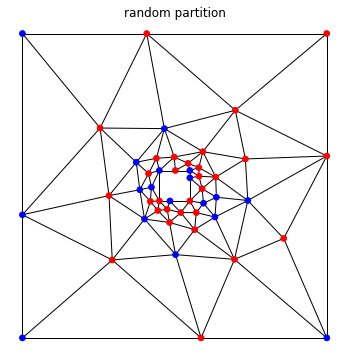

In [5]:
colors = []
for v in G.nodes():
    if np.random.rand() < 0.5:
        colors.append('r')
    else:
        colors.append('b')
print('Colors:', colors)   
plt.ion()
plt.figure(figsize=(6,6))
plt.title('random partition')
plt.axis('equal')
nx.draw(G, pos = xycoords, node_size = 32, node_shape = 'o', node_color = colors)

# Eigenvalues and eigenvectors of the Laplacian

In [7]:
%time lam,W = spla.eigh(L)

CPU times: user 5 ms, sys: 1.48 ms, total: 6.47 ms
Wall time: 4.4 ms


In [8]:
print('W.shape:', W.shape)
print('First entries of lam:', lam[:6])

W.shape: (48, 48)
First entries of lam: [8.8818e-15 6.1356e-01 7.2802e-01 8.0652e-01 1.3861e+00 1.5255e+00]


In [9]:
fiedler_value = lam[1]
fiedler_vector = W[:,1]
print('Fiedler value:', fiedler_value)
print('Fiedler vector:')
print(fiedler_vector)

Fiedler value: 0.6135646587473822
Fiedler vector:
[-0.0328 -0.0679  0.009   0.105   0.2129  0.2206  0.199   0.0827 -0.164
 -0.0174  0.1048  0.0859 -0.0739 -0.2028 -0.2487 -0.2433 -0.1947 -0.232
 -0.1289 -0.1892  0.0487 -0.0898 -0.0484  0.1199  0.1657  0.152   0.1615
  0.0548  0.1885 -0.1368 -0.2003 -0.1416 -0.0459 -0.0044  0.0689  0.1112
  0.0719  0.1636  0.1707 -0.204   0.2016 -0.1317 -0.1127  0.1824 -0.0442
 -0.0157  0.1717 -0.0817]
